# EDS Simulation

In [ ]:
# This Example is building up a simple simulation

import os, sys

my_path = os.getcwd()+"/.."
print(my_path)
sys.path.append(my_path)

# simple Example plot Enveloped Potential with two Harmonic Oscilators
##Imports:
import numpy as np
from matplotlib import pyplot as plt

#import Ensembler
from ensembler.potentials import OneD as pot
from ensembler.potentials import ND as potN
from ensembler.visualisation import plotPotentials as exPlot
from ensembler.integrator.stochastic import metropolisMonteCarloIntegrator
from ensembler.system import system

#import Visualisations
from ensembler.visualisation.plotSimulations import static_sim_plots
from ensembler.visualisation.animationSimulation import animation_trajectory, animation_EDS_trajectory


##Imports:
import ensembler.visualisation.plotPotentials as exPlot


%matplotlib inline

C:\Users\benja\OneDrive - ETHZ\PhD\Code\ensembler_public\examples/..


# ABOUT THE POTENTIAL

## interactive example

In [ ]:
from visualisation.interactive_plots import interactive_eds

interactive_eds()


## Building an EDS Potential

harmonicOscilator
	States: 1
	Dimensions: 1

	Functional:
 		V:	Voffset + 0.5*k*(r - r_0)**2
		dVdpos:	0.5*k*(2*r - 2*r_0)

	Simplified Function
		V:	0.5*(r + 2)**2
		dVdpos:	1.0*r + 2.0

	Constants: 
		k: 			1.0
		r_0: 			-2
		Voffset: 			0.0
		nDim: 			1

 harmonicOscilator
	States: 1
	Dimensions: 1

	Functional:
 		V:	Voffset + 0.5*k*(r - r_0)**2
		dVdpos:	0.5*k*(2*r - 2*r_0)

	Simplified Function
		V:	0.5*(r - 2)**2
		dVdpos:	1.0*r - 2.0

	Constants: 
		k: 			1.0
		r_0: 			2
		Voffset: 			0.0
		nDim: 			1


Enveloping Potential
	States: 2
	Dimensions: 1


calculate 100 positions: 
Wall time: 13 ms

Visualization


(0, 2)

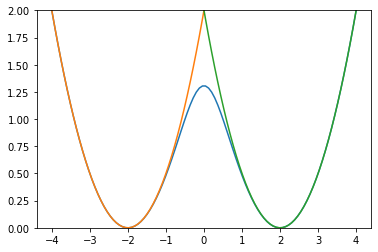

In [11]:
test_timing_with_points=100
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = pot.harmonicOscillator(x_shift=-2)
w2 = pot.harmonicOscillator(x_shift=2)

print(w1, w2)
V = pot.envelopedPotential(V_is=[w1,w2], Eoff_i=[0,0])
print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")

#Plotting
plt.plot(positions, V.ene(positions))
plt.plot(positions, w1.ene(positions))
plt.plot(positions, w2.ene(positions))
plt.ylim([0,2])


# What can the parameters for EDS DO?

## Energy Offsets

## Smoothing Parameter

(<Figure size 1440x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25d517f4208>)

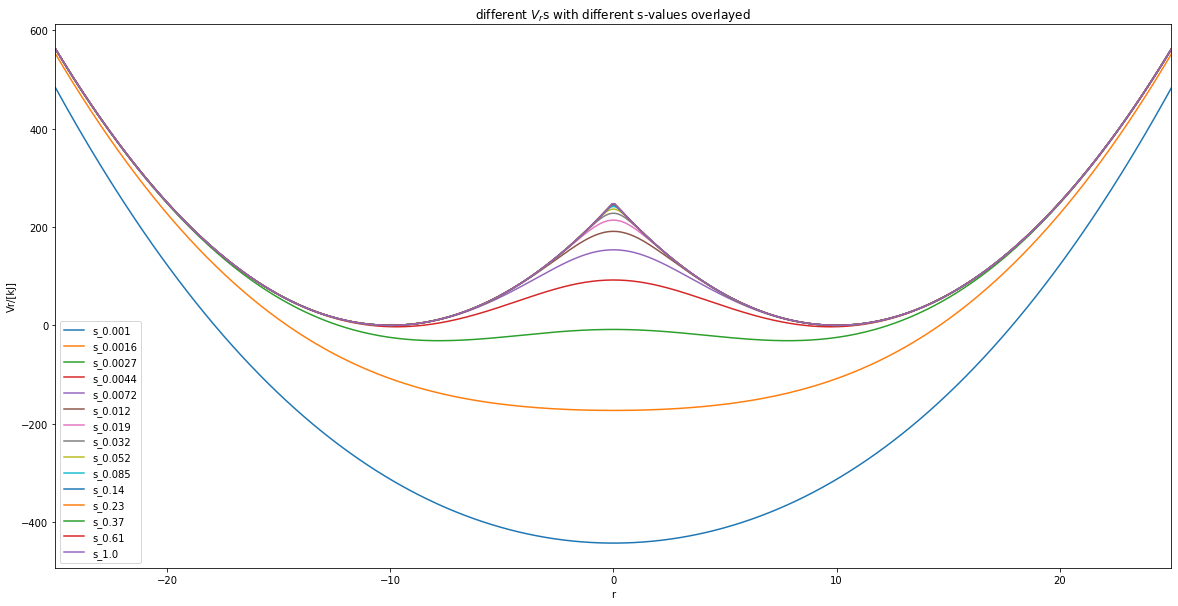

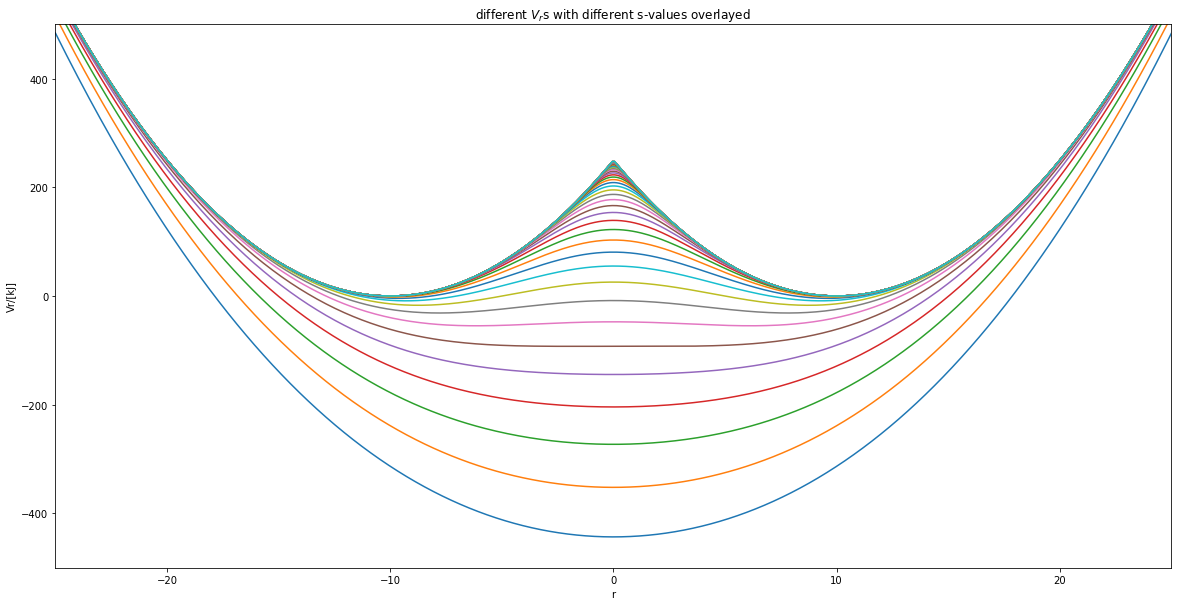

In [17]:

##Construct potential
s=1
Eoffs=(0, 0)
V_is=[pot.harmonicOscillator(x_shift=10, k=5), pot.harmonicOscillator(x_shift=-10, k=5)]
eds_pot = pot.envelopedPotential(V_is=V_is, s=s, Eoff_i=Eoffs)


##Parameters
svals= np.logspace(0, -3,num=50)
less_svals= np.logspace(0, -3,num=15)
positions = np.linspace(-25,25, 500)

##Plot
exPlot.envPot_differentS_overlay_plot(eds_potential=eds_pot, s_values=less_svals, positions=positions)
exPlot.envPot_differentS_overlay_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           hide_legend=True, y_range=(-500, 500))

## Many States

(<Figure size 1440x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25d51985f48>)

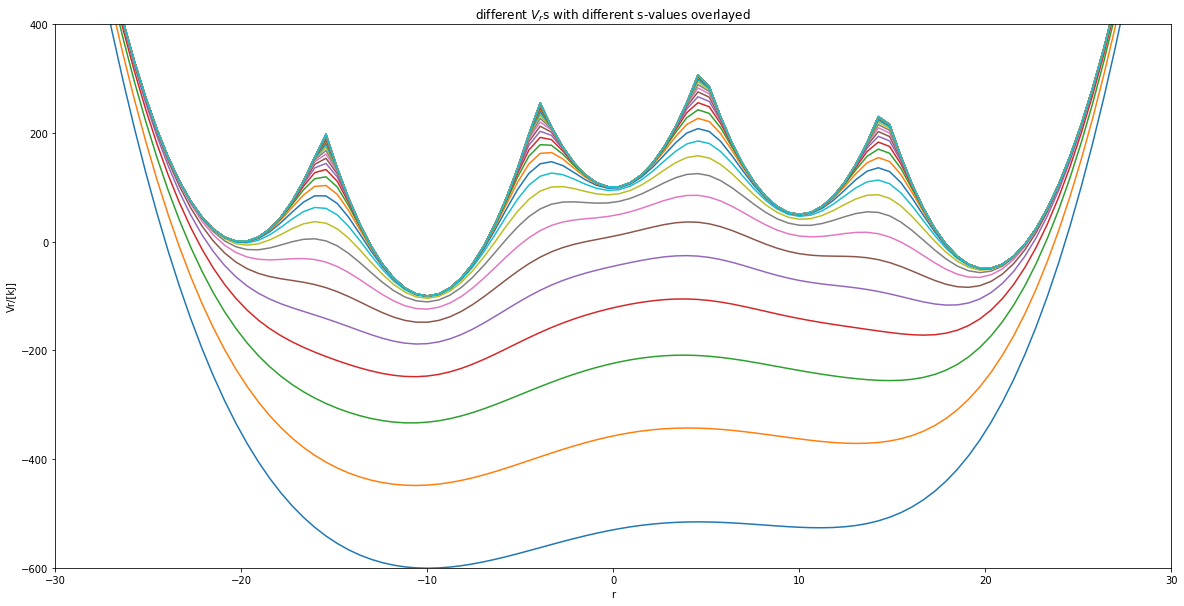

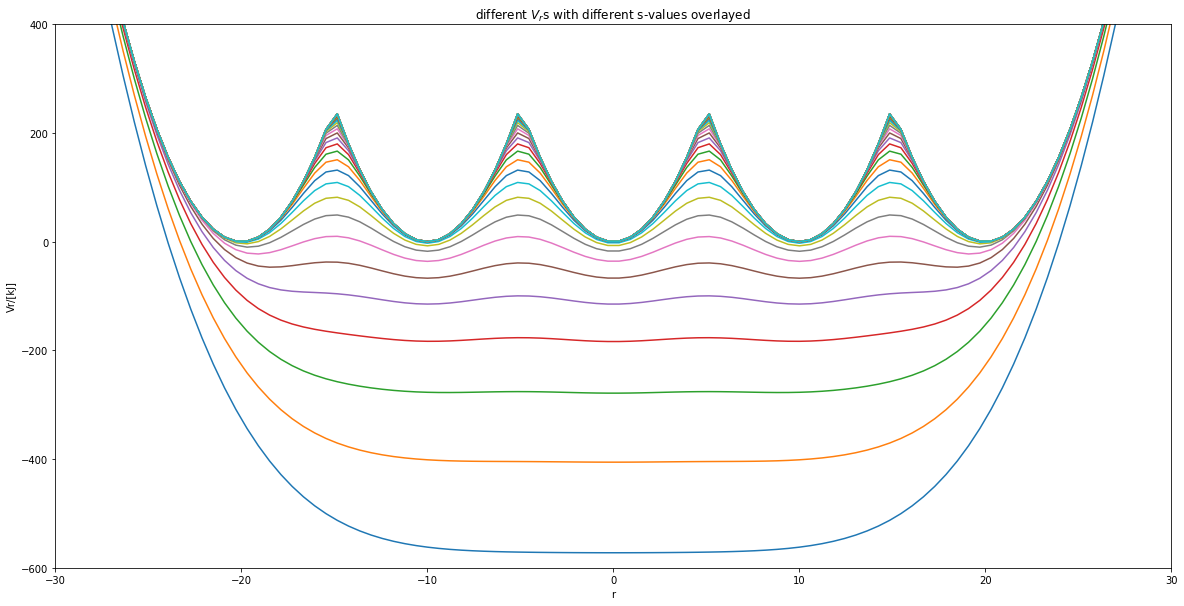

In [22]:
### SuperMore complex example - 3 states  harmonicPot - 
# simple Example plot Enveloped Potential with two Harmonic Oscilators


##Construct potential
s1=1.0
s2=0.001
Eoffs=(0, 50, -50, 100, -100)


#V_is=[pot.harmonicOsc1D(x_shift=-10, fc=5), pot.harmonicOsc1D(x_shift=10, fc=5)]
k=20
V_is=[pot.harmonicOscillator(x_shift=-20, k=k), pot.harmonicOscillator(x_shift=20, k=k),
      pot.harmonicOscillator(x_shift=10, k=k), pot.harmonicOscillator(x_shift=-10, k=k), pot.harmonicOscillator(x_shift=0, k=k)]
eds_pot = pot.envelopedPotential(V_is=V_is, s=s1, Eoff_i=Eoffs)

##Parameters
positions = np.linspace(-30,30,100)
svals=np.logspace(0, -3, 40)

exPlot.envPot_differentS_overlay_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           y_range=(-600,400), hide_legend=True)

Eoffs=(0, 0, 0, 0, 0)
eds_pot = pot.envelopedPotential(V_is=V_is, s=s1, Eoff_i=Eoffs)
exPlot.envPot_differentS_overlay_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           y_range=(-600,400), hide_legend=True)